In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import numpy as np

In [2]:
cleaned_df = pd.read_csv('../data/cleaned_tweet_data.csv')
cleaned_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2022-08-03 20:19:13+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"['Pelosi', 'Taiwan', 'NATO', '5G']",Flightradar24,Algérie,airplane landed safely in 🇹🇼 \r\n1 both 🇨🇳...
1,2022-08-02 15:24:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...",Reno Omokri,NaN,watch the video of the beginning of the chines...
2,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \r\n#Taipei \r\n#taiwan\r\n#XiJinping ...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...",Peter Obi,Algérie,\r\n \r\n\r\n \r\n \r\non a verge of another ...
3,2022-08-01 13:51:42+00:00,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...",BBC News (World),Chlef,strong ✍️💜
4,2022-07-31 20:02:20+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\r\n#china\r\nChina Time ✌️ https://t.c...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"['Pelosi', 'china']",Nancy Pelosi,Algérie,\r\n\r\nchina time ✌️


In [3]:
# useful functions

# a definition to categorize the texts
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"

# a def to remove neutral values
def remove_neutrals(value):
    return value != "neutral"


### Let's interprete the polarity of each tweet

In [4]:
cleaned_df['polarity'] = cleaned_df['polarity'].apply(pd.to_numeric)
cleaned_df['score'] = cleaned_df['polarity'].apply(text_category)
cleaned_df['score'].value_counts()

positive    7866
neutral     7491
negative    2496
Name: score, dtype: int64

 <b>Sentiment Analysis :</b>identify and extract information.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

Visualize tweets' score

<AxesSubplot:title={'center':'score'}>

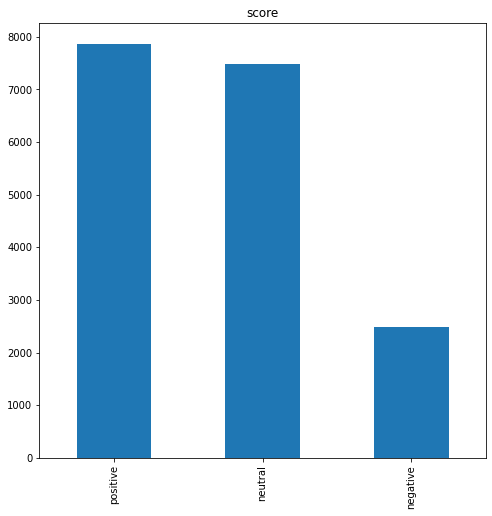

In [6]:
score_count =  cleaned_df['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

convert to root form

In [7]:
stemmer = PorterStemmer()
def stem_word(text: str) -> str:
    
    stemmed_words = []
    sent_list = text.split()
    
    for word in sent_list:
        try:
            stemmed_words.append(stemmer.stem(word)) 
        except:
             stemmed_words.append(word)
    return ' '.join(stemmed_words)

In [8]:
cleaned_df = cleaned_df.astype({"clean_text": str})
cleanedTweet = cleaned_df[cleaned_df['score'].map(remove_neutrals)]
cleanedTweet['score'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(stem_word)

C:\Users\Natnael\AppData\Local\Temp\ipykernel_8900\282449689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedTweet['score'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)
C:\Users\Natnael\AppData\Local\Temp\ipykernel_8900\282449689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(stem_word)


In [12]:
cleanedTweet[['score','clean_text']][:5]

,score,clean_text
0,1,airplan land safe in 🇹🇼 1 both 🇨🇳 amp 🇺🇸 are p...
3,1,strong ✍️💜
5,1,v382 intro logo anim blue smoke 💙 if you are l...
7,0,when your miss her but she far
9,1,twitter will make laugh and scare on the taiwa...


In [14]:
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score']
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_vectorizer.fit(X.values)

CountVectorizer(ngram_range=(3, 3))

In [15]:
X_trigram = trigram_vectorizer.transform(X.values)

In [16]:
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer()

In [17]:
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)